# Plots, plots, plots!

In [2]:
import pandas as pd
import seaborn as sns



file = 'https://raw.githubusercontent.com/ethanweed/Stroop/master/Stroop-raw-over-the-years.csv'
rawdata = pd.read_csv(file)
rawdata.head()

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,4.16,6.76,4.45,4.65,2015
1,4.35,7.73,4.78,4.46,2015
2,3.60,7.00,4.00,3.50,2015
3,3.90,9.03,4.60,6.30,2015
4,4.22,9.98,6.83,6.24,2015


### Transform data from wide to long format

In [3]:

df = pd.melt(rawdata, 
             id_vars = 'Year', 
             var_name = 'Condition', 
             value_name = 'RT')

df.head()

,Year,Condition,RT
0,2015,Reading_NoInt,4.16
1,2015,Reading_NoInt,4.35
2,2015,Reading_NoInt,3.60
3,2015,Reading_NoInt,3.90
4,2015,Reading_NoInt,4.22


## Scatter plots

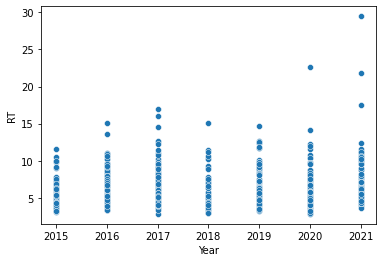

In [4]:
# Year on x-axis
ax = sns.scatterplot(data = df, x = 'Year', y = 'RT')

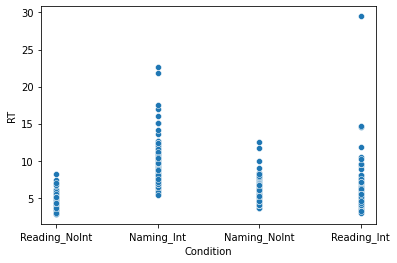

In [5]:
# Condtion on x-axis
ax = sns.scatterplot(data = df, x = 'Condition', y = 'RT')

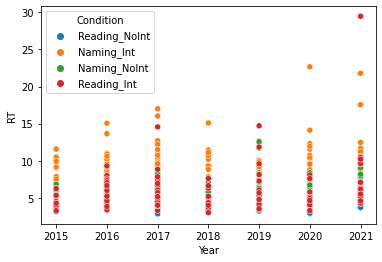

In [6]:
# Year on x-axis, color for Condition
ax = sns.scatterplot(data = df, x = 'Year', y = 'RT', hue = 'Condition')

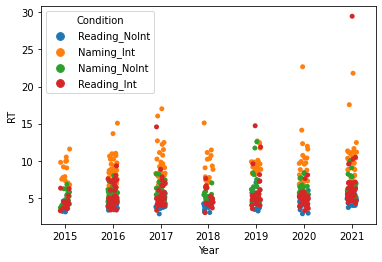

In [7]:
# Year on x-axis, color for Condition
# Now, with jittered points
ax = sns.stripplot(data = df, x = 'Year', y = 'RT', hue = 'Condition')

## Scatter plot with trend lines

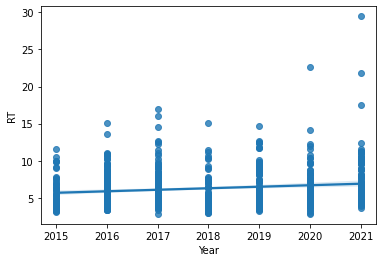

In [8]:
# One trend line for all points
ax = sns.regplot(data = df, x = 'Year', y = 'RT')

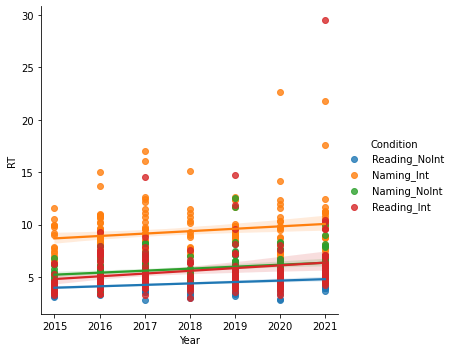

In [9]:
# separate trend lines for conditions
ax = sns.lmplot(data = df, x = 'Year', y = 'RT', hue = 'Condition')

## Bar plots

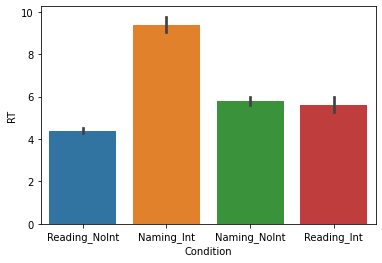

In [10]:
# your basic, standard, barplot. Yawn.
ax = sns.barplot(data = df, x = 'Condition', y = 'RT')

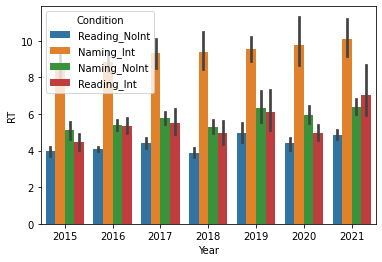

In [11]:
# Grouped bar plots
ax = sns.barplot(data = df, x = 'Year', y = 'RT', hue = 'Condition')

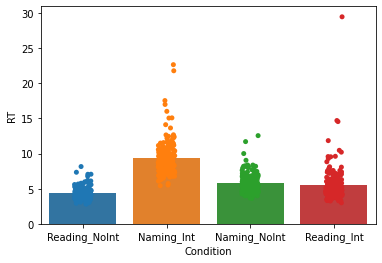

In [12]:
# Barplots with jittered points overlayed
ax = sns.barplot(data = df, x = 'Condition', y = 'RT')
ax = sns.stripplot(data = df, x = 'Condition', y = 'RT')

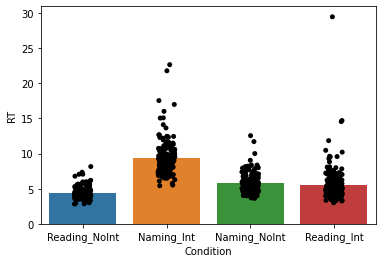

In [13]:
# Barplots with jittered black points overlayed
ax = sns.barplot(data = df, x = 'Condition', y = 'RT')
ax = sns.stripplot(data = df, x = 'Condition', y = 'RT',color = 'black')

## Line plots

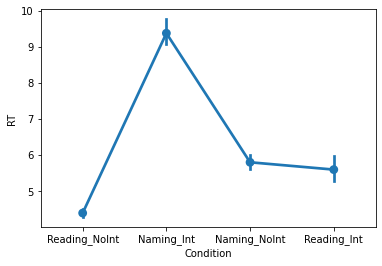

In [14]:
# One line
ax = sns.pointplot(data = df, x = 'Condition', y = 'RT')

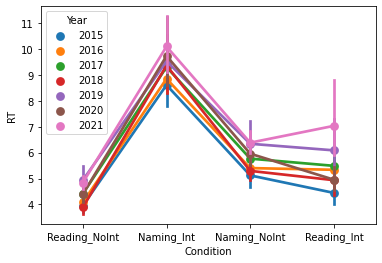

In [15]:
# Multiple lines
ax = sns.pointplot(data = df, x = 'Condition', y = 'RT', hue = 'Year')

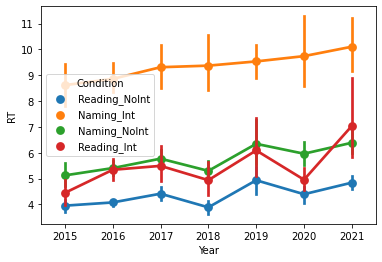

In [17]:
#Multiple lines by condition
ax = sns.pointplot(data = df, x = 'Year', y = 'RT', hue = 'Condition')

## Box plots

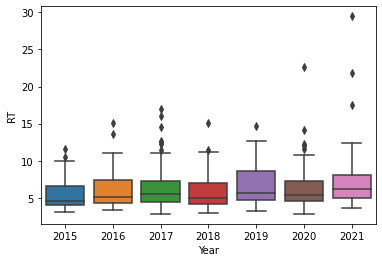

In [18]:
# Good ol' boxplots
ax = sns.boxplot(data = df, x = 'Year', y = 'RT')

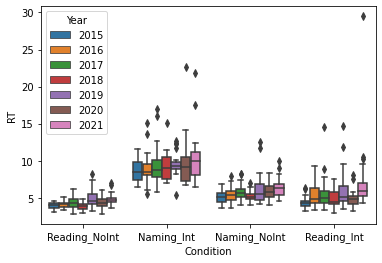

In [19]:
# Grouped boxplots
ax = sns.boxplot(data = df, x = 'Condition', y = 'RT', hue = 'Year')

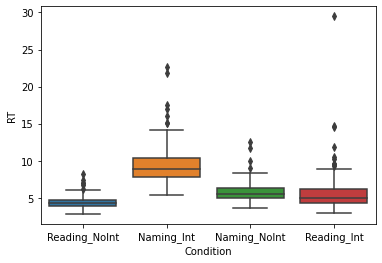

In [20]:
# Good ol' boxplots by condition
ax = sns.boxplot(data = df, x = 'Condition', y = 'RT')

## Violin plots

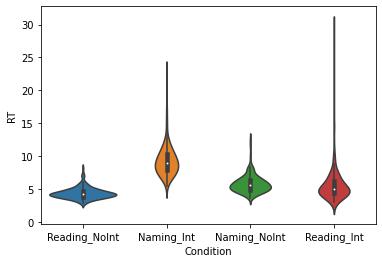

In [21]:
# Hmm. These don't look much like a violin.
ax = sns.violinplot(data = df, x = 'Condition', y = 'RT')

## Density plots

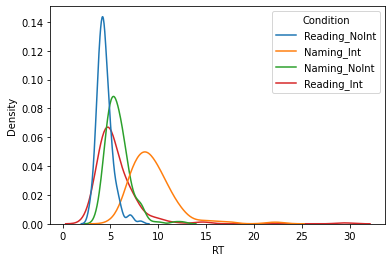

In [22]:
ax = sns.kdeplot(data = df, x = 'RT', hue = 'Condition')

## "Two-way factorial" plot

In [23]:
rawdata.head()

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,4.16,6.76,4.45,4.65,2015
1,4.35,7.73,4.78,4.46,2015
2,3.60,7.00,4.00,3.50,2015
3,3.90,9.03,4.60,6.30,2015
4,4.22,9.98,6.83,6.24,2015


In [24]:
# separate Task from Condition

rawdata = pd.read_csv(file)
df2 = rawdata
df2.reset_index(inplace = True)
df2 = df2.rename(columns = {'index':'Id'})

df2

df2 = pd.wide_to_long(df2, stubnames = ['Reading','Naming'], 
                          i=['Id'], 
                          j='Condition', 
                          sep = '_', 
                          suffix = '.+')

df2.reset_index(inplace = True)

df2

,Id,Condition,Year,Reading,Naming
0,0,NoInt,2015,4.16,4.45
1,1,NoInt,2015,4.35,4.78
2,2,NoInt,2015,3.60,4.00
3,3,NoInt,2015,3.90,4.60
4,4,NoInt,2015,4.22,6.83
...,...,...,...,...,...
359,177,Int,2021,4.28,7.08
360,178,Int,2021,5.49,9.66
361,179,Int,2021,5.16,7.52
362,180,Int,2021,5.51,8.81


In [25]:
# Convert Reading and Naming columns to a column of labels and a column of data (wide to long)

df2 = pd.melt(df2, id_vars = ['Id', 'Condition', 'Year'], 
              var_name = 'Task', 
              value_name = 'RT')
df2

,Id,Condition,Year,Task,RT
0,0,NoInt,2015,Reading,4.16
1,1,NoInt,2015,Reading,4.35
2,2,NoInt,2015,Reading,3.60
3,3,NoInt,2015,Reading,3.90
4,4,NoInt,2015,Reading,4.22
...,...,...,...,...,...
723,177,Int,2021,Naming,7.08
724,178,Int,2021,Naming,9.66
725,179,Int,2021,Naming,7.52
726,180,Int,2021,Naming,8.81


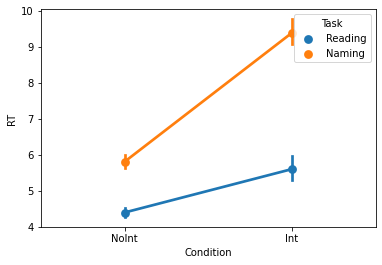

In [26]:
# plot condition on x-axis
# show separate lines for Task

ax = sns.pointplot(data = df2, x = 'Condition', y = 'RT', hue = 'Task')

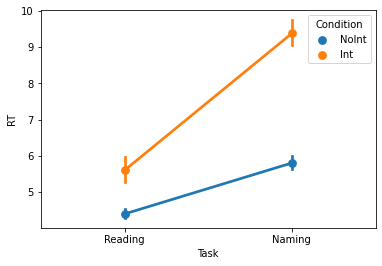

In [27]:
# or, put Task on x-axis and Condition on separate lines

ax = sns.pointplot(data = df2, x = 'Task', y = 'RT', hue = 'Condition')